In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

np.random.seed(1234)

In [5]:
TEST_PREDICTIONS_FILENAME = "/run/media/kovalexal/DATA/unet-heatmap-regression_test_predictions_10_final.pkl"
# TEST_PREDICTIONS_FILENAME = "/run/media/kovalexal/DATA/unet-heatmap-regression_test_predictions_7_final.pkl"
# TEST_PREDICTIONS_FILENAME = "/run/media/kovalexal/DATA/unet-heatmap-regression_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 16
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [6]:
def draw_landmarks(image, landmarks):
    image = image.copy()
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [7]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 99819
Landmarks shape: (99819, 971, 2)


In [8]:
landmarks[0, :, :]

array([[ 55.59393692, 117.83898163],
       [ 54.42339325, 117.72490692],
       [ 53.31288528, 117.32540131],
       ...,
       [ 46.40483093,  88.61206818],
       [ 40.04256821,  62.62289429],
       [ 69.90376282,  60.30739975]])

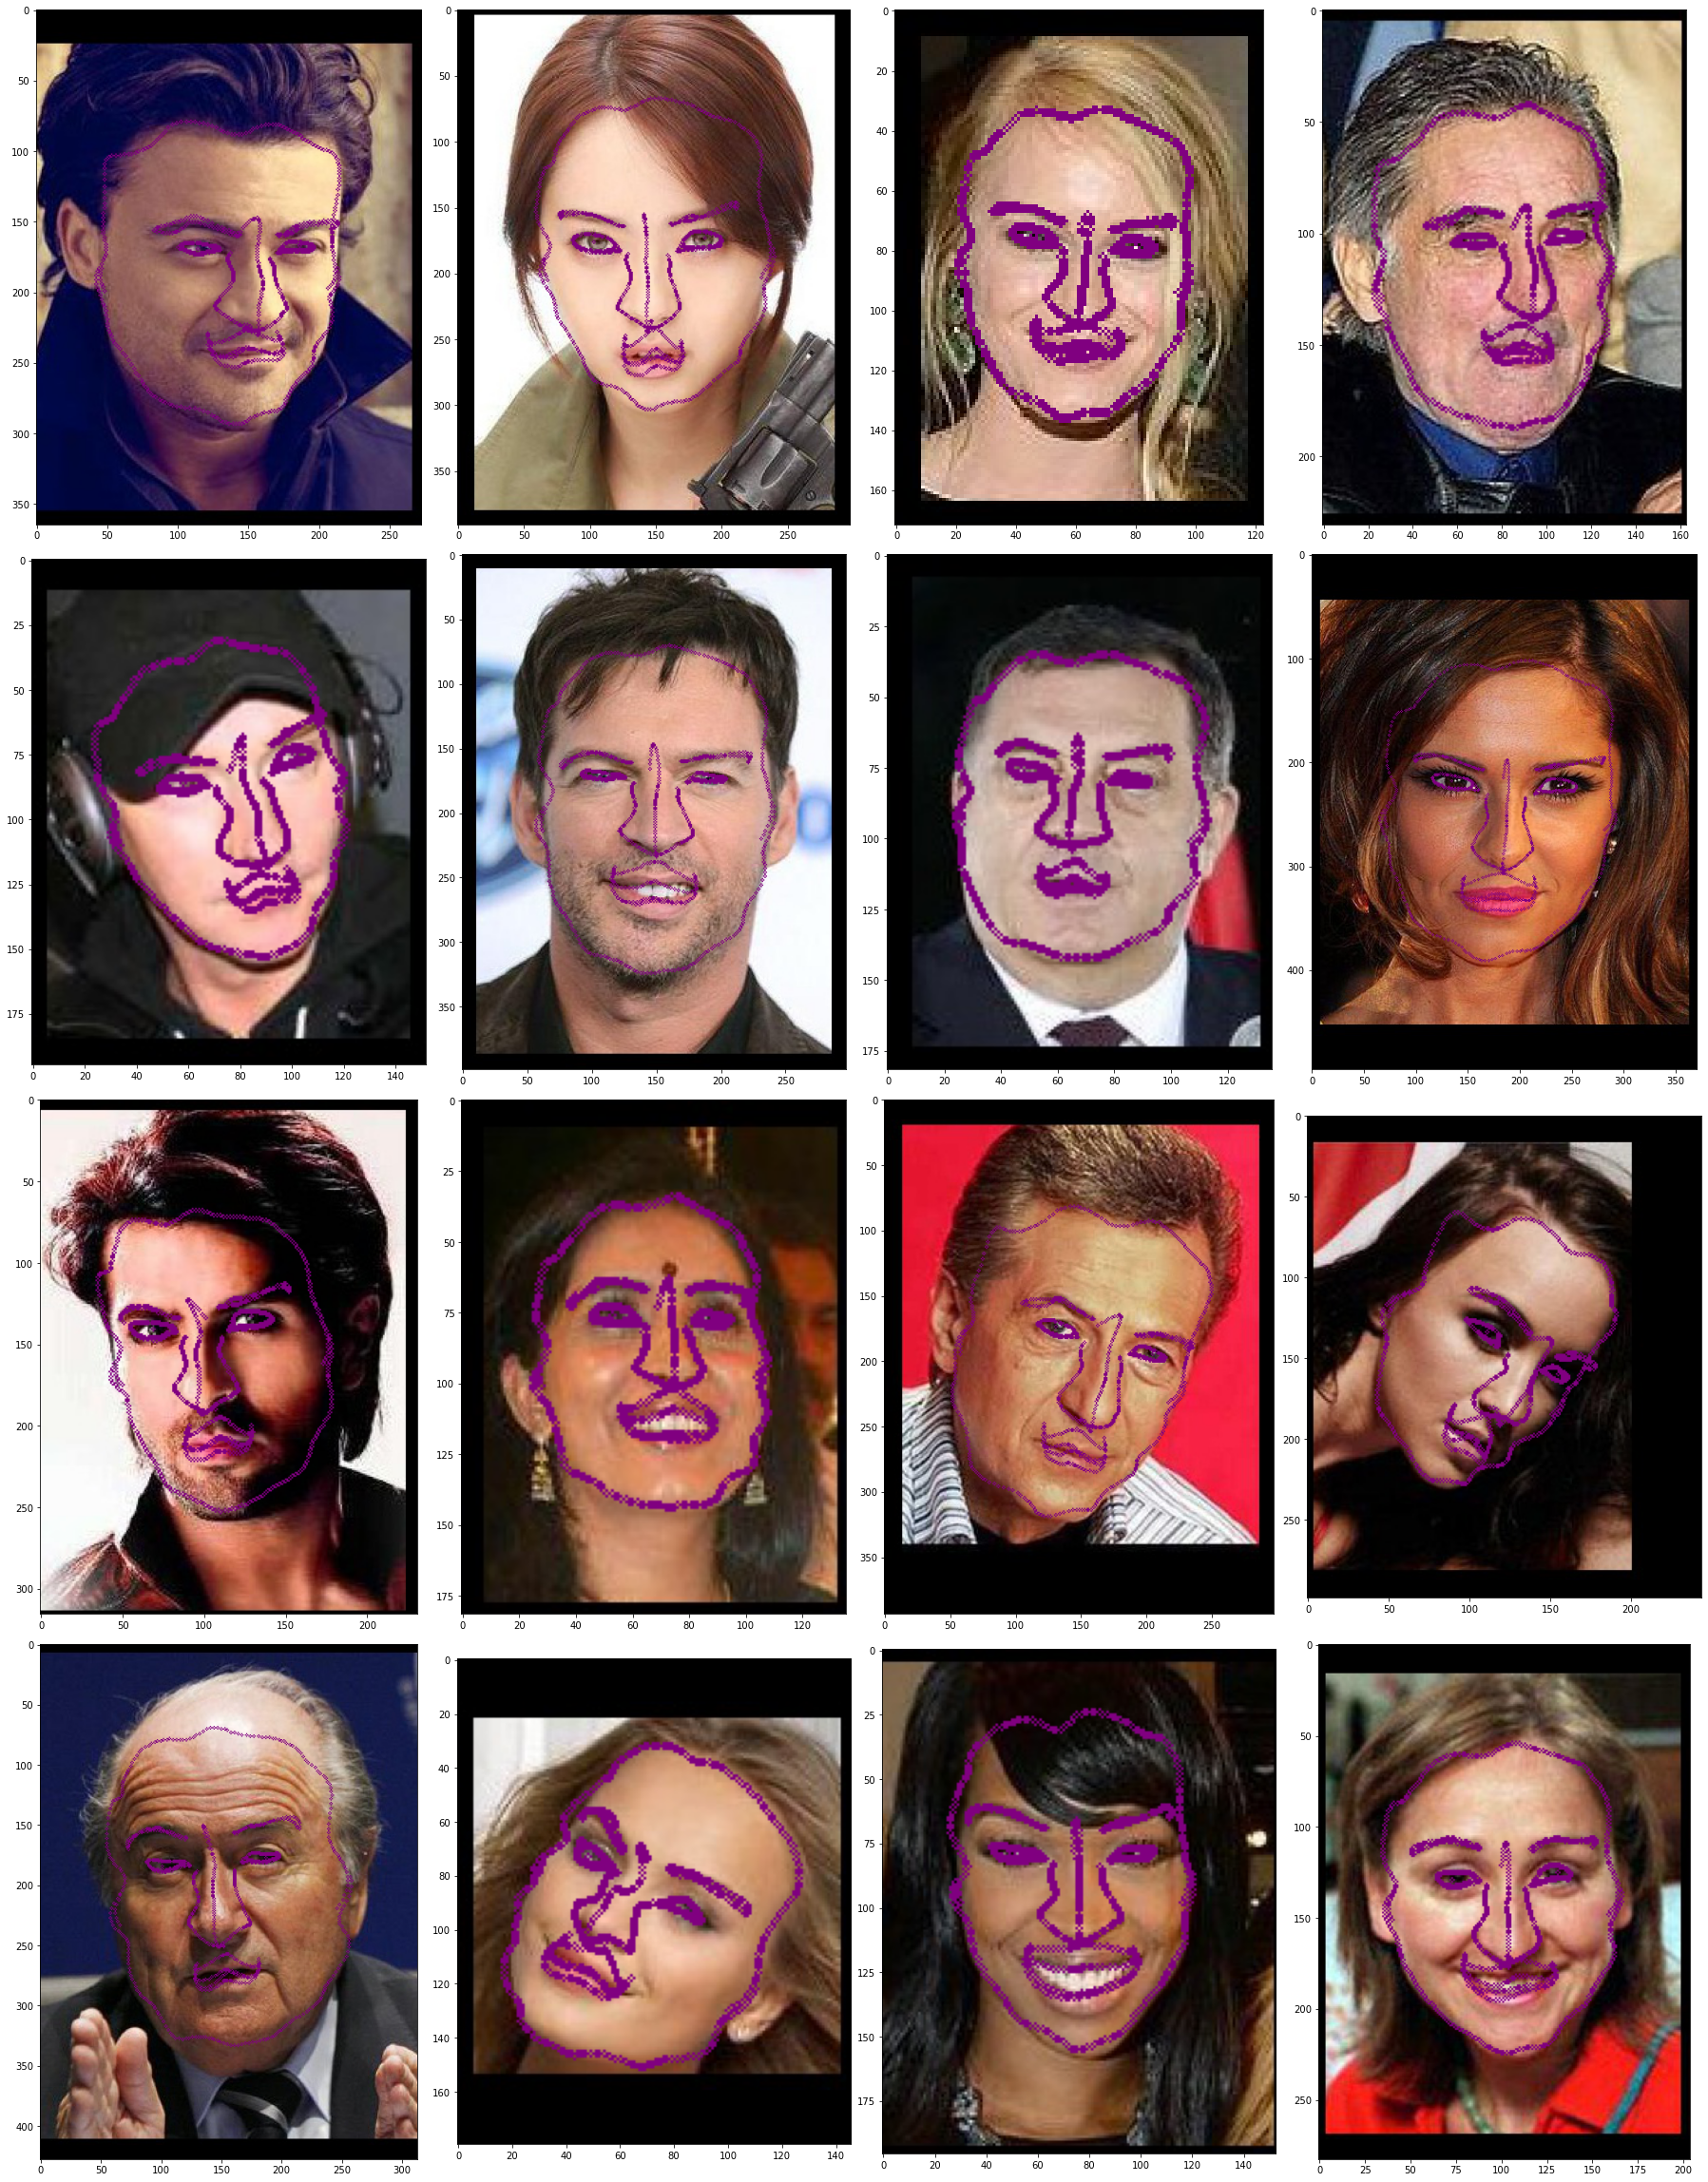

In [9]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()